# Creating LRP Figures
Functions to create several of the Figures for the manuscript. The LRP heatmaps have been created using the scripts *[UKB] Feature visualization development-Baseline.ipynb* and *[UKB] Feature visualization development-PIF.ipynb*

In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import nibabel as nib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size':8,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [4]:
exp_model_dir = "/ritter/share/projects/Methods/Eitel_local_filter/experiments_submission/models/UKB/full_set/10xrandom_splits/experiment_r2/"
bsl_model_dir = "/ritter/share/projects/Methods/Eitel_local_filter/experiments_submission/models/UKB/full_set/10xrandom_splits/baseline_r2/"
exp_heatmap_dir = exp_model_dir.replace("models", "heatmaps")
bsl_heatmap_dir = bsl_model_dir.replace("models", "heatmaps")

In [5]:
save_dir = "/analysis/fabiane/documents/publications/patch_individual_filter_layers/MIA_revision/"

### Baseline comparison

In [6]:
!ls $bsl_heatmap_dir

LRP_latent-feature-map_visualization_Layer-Conv3_Filter-0.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-15.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-17.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-2.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-33.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-45.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-4.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-60.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv4_Filter-0.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv4_Filter-15.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv4_Filter-17.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv4_Filter-2.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv4_Filter-33.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv4_Filter-45.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv4_Filter-4.nii.gz
LRP_latent-featu

In [7]:
!ls $save_dir

LRP_heatmaps_baseline_UKB-img0.png
LRP_heatmaps_baseline_UKB-img1.png
LRP_heatmaps_baseline_UKB-img2.png
LRP_heatmaps_baseline_UKB-img3.png
LRP_heatmaps_baseline_UKB-img4.png
LRP_heatmaps_baseline_UKB-img5.png
LRP_heatmaps_baseline_UKB-img6.png
LRP_heatmaps_baseline_UKB-img7.png
LRP_heatmaps_baseline_UKB-img8.png
LRP_heatmaps_baseline_UKB-img9.png
LRP_heatmaps_baseline_UKB.pgf
LRP_heatmaps_experiment_conv4+score_UKB-img0.png
LRP_heatmaps_experiment_conv4+score_UKB-img1.png
LRP_heatmaps_experiment_conv4+score_UKB-img2.png
LRP_heatmaps_experiment_conv4+score_UKB-img3.png
LRP_heatmaps_experiment_conv4+score_UKB-img4.png
LRP_heatmaps_experiment_conv4+score_UKB-img5.png
LRP_heatmaps_experiment_conv4+score_UKB.pgf
LRP_heatmaps_experiment_PIF-layer_UKB-img0.png
LRP_heatmaps_experiment_PIF-layer_UKB-img10.png
LRP_heatmaps_experiment_PIF-layer_UKB-img11.png
LRP_heatmaps_experiment_PIF-layer_UKB-img12.png
LRP_heatmaps_experiment_PIF-layer_UKB-img13.png
LRP_heatmaps_experiment_PIF-layer_UKB-img14

In [8]:
filter_pos_list = [0, 4, 15, 60]
lrp_layer_list = ["Conv3", "Conv4", "Score/Final Output"]

fig = plt.figure(figsize=(14, 5))
outer = gridspec.GridSpec(1, 3, wspace=0.1, hspace=0.1)

for i, lrp_layer in enumerate(lrp_layer_list):
    # set outer titles
    ax = plt.Subplot(fig, outer[i])
    ax.set_title("Layer {}".format(lrp_layer))
    ax.axis('off')
    fig.add_subplot(ax)
    if i < 2:
        # create inner plots
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
        for j, filter_pos in enumerate(filter_pos_list):
            # create image plot
            ax = plt.Subplot(fig, inner[j])
            # load image
            bsl_nifti = nib.load(os.path.join(bsl_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-{}_Filter-{}.nii.gz".format(lrp_layer, filter_pos)))
            bsl_img = bsl_nifti.get_data()
            vmin, vmax = np.percentile(bsl_img, 90.0), np.percentile(bsl_img, 99.9)
            ax.imshow(bsl_img[:,:,90], cmap='Reds', vmin=vmin, vmax=vmax)
            # modify
            ax.set_title("Filter {}".format(filter_pos))
            ax.set_xticks([])
            ax.set_yticks([])
            #ax.axis('off')
            fig.add_subplot(ax)
    else:
        # load image
        bsl_nifti = nib.load(os.path.join(bsl_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-score.nii.gz".format(lrp_layer)))
        bsl_img = bsl_nifti.get_data()
        vmin, vmax = np.percentile(bsl_img, 90.0), np.percentile(bsl_img, 99.9)
        ax.set_title(lrp_layer)
        ax.axis("on")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(bsl_img[:,:,90], cmap='Reds', vmin=vmin, vmax=vmax)
        
fig.suptitle("LRP heatmaps of baseline model", fontsize=10, y=0.2)
fig.show();

In [9]:
filter_pos_list = [0, 4, 15, 60]
lrp_layer_list = ["Conv3", "Conv4", "Score/Final Output"]

fig = plt.figure()
fig.set_size_inches(w=7.23, h=3.6)
outer = gridspec.GridSpec(1, 3, wspace=0.1, hspace=0.5)

for i, lrp_layer in enumerate(lrp_layer_list):
    # set outer titles
    ax = plt.Subplot(fig, outer[i])
    ax.set_title("Layer {}".format(lrp_layer), fontweight="bold")
    ax.axis('off')
    fig.add_subplot(ax)
    if i < 2:
        # create inner plots
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
        for j, filter_pos in enumerate(filter_pos_list):
            # create image plot
            ax = plt.Subplot(fig, inner[j])
            # load image
            bsl_nifti = nib.load(os.path.join(bsl_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-{}_Filter-{}.nii.gz".format(lrp_layer, filter_pos)))
            bsl_img = bsl_nifti.get_data()
            vmin, vmax = np.percentile(bsl_img, 90.0), np.percentile(bsl_img, 99.95)
            ax.imshow(np.rot90(bsl_img[:,:,47]), cmap='hot', vmin=vmin, vmax=vmax)
            # modify
            ax.set_title("Filter {}".format(filter_pos))
            ax.set_xticks([])
            ax.set_yticks([])
            #ax.axis('off')
            fig.add_subplot(ax)
    else:
        # load image
        bsl_nifti = nib.load(os.path.join(bsl_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-score.nii.gz".format(lrp_layer)))
        bsl_img = bsl_nifti.get_data()
        vmin, vmax = np.percentile(bsl_img, 90.0), np.percentile(bsl_img, 99.95)
        ax.set_title(lrp_layer, fontweight="bold")
        ax.axis("on")
        ax.set_xticks([])
        ax.set_yticks([])
        im = ax.imshow(np.rot90(bsl_img[:,:,47]), cmap='hot', vmin=vmin, vmax=vmax)
        
fig.suptitle("LRP heatmaps of baseline model", fontsize=11, y=0.1, fontweight="bold")
#fig.tight_layout()
fig.colorbar(im)
fig.savefig(os.path.join(save_dir, "LRP_heatmaps_baseline_UKB.pgf"), bbox_inches='tight', dpi=250)
fig.show();

In [10]:
filter_pos_list = [0, 4, 15, 60]
lrp_layer_list = ["Conv3", "Conv4", "Score/Final Output"]

fig = plt.figure(figsize=(14, 5))
outer = gridspec.GridSpec(1, 3, wspace=0.1, hspace=0.1)

for i, lrp_layer in enumerate(lrp_layer_list):
    # set outer titles
    ax = plt.Subplot(fig, outer[i])
    ax.set_title("Layer {}".format(lrp_layer), fontweight="bold")
    ax.axis('off')
    fig.add_subplot(ax)
    if i < 2:
        # create inner plots
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
        for j, filter_pos in enumerate(filter_pos_list):
            # create image plot
            ax = plt.Subplot(fig, inner[j])
            # load image
            bsl_nifti = nib.load(os.path.join(bsl_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-{}_Filter-{}.nii.gz".format(lrp_layer, filter_pos)))
            bsl_img = bsl_nifti.get_data()
            vmin, vmax = np.percentile(bsl_img, 95.0), np.percentile(bsl_img, 99.95)
            ax.imshow(np.rot90(bsl_img[48,:,:]), cmap='hot', vmin=vmin, vmax=vmax)
            # modify
            ax.set_title("Filter {}".format(filter_pos))
            ax.set_xticks([])
            ax.set_yticks([])
            #ax.axis('off')
            fig.add_subplot(ax)
    else:
        # load image
        bsl_nifti = nib.load(os.path.join(bsl_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-score.nii.gz".format(lrp_layer)))
        bsl_img = bsl_nifti.get_data()
        vmin, vmax = np.percentile(bsl_img, 95.0), np.percentile(bsl_img, 99.95)
        ax.set_title(lrp_layer, fontweight="bold")
        ax.axis("on")
        ax.set_xticks([])
        ax.set_yticks([])
        im = ax.imshow(np.rot90(bsl_img[48,:,:]), cmap='hot', vmin=vmin, vmax=vmax)
        
fig.colorbar(im)
fig.suptitle("LRP heatmaps of baseline model", fontweight="bold")
fig.show()

### PIF layer comparison

In [9]:
!ls $exp_heatmap_dir

LRP_latent-feature-map_visualization_Layer-Conv3_Filter-0.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-15.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-22.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-30.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-32.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-4.nii.gz
LRP_latent-feature-map_visualization_Layer-Conv3_Filter-60.nii.gz
LRP_latent-feature-map_visualization_Layer-pif_layer_Patch-1_Filter-0.nii.gz
LRP_latent-feature-map_visualization_Layer-pif_layer_Patch-1_Filter-1.nii.gz
LRP_latent-feature-map_visualization_Layer-pif_layer_Patch-1_Filter-2.nii.gz
LRP_latent-feature-map_visualization_Layer-pif_layer_Patch-1_Filter-4.nii.gz
LRP_latent-feature-map_visualization_Layer-pif_layer_Patch-2_Filter-0.nii.gz
LRP_latent-feature-map_visualization_Layer-pif_layer_Patch-2_Filter-1.nii.gz
LRP_latent-feature-map_visualization_Layer-pif_layer_Patch-2_Filter-2.nii.gz
L

In [10]:
filter_pos_list = [0, 1, 2, 4]
lrp_layer = "pif_layer"
patch_list = [1, 3, 5, 8]

fig = plt.figure()
fig.set_size_inches(w=7.23, h=3)
outer = gridspec.GridSpec(1, 4, wspace=0.1, hspace=0.1)

for i, patch_pos in enumerate(patch_list):
    # set outer titles
    ax = plt.Subplot(fig, outer[i], )
    ax.set_title("Patch {}".format(patch_pos), fontweight="bold")
    ax.axis('off')
    fig.add_subplot(ax)
    # create inner plots
    inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                subplot_spec=outer[i], wspace=0.1, hspace=0.)
    for j, filter_pos in enumerate(filter_pos_list):
        # create image plot
        ax = plt.Subplot(fig, inner[j])
        # load image
        exp_nifti = nib.load(os.path.join(exp_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-{}_Patch-{}_Filter-{}.nii.gz".format(lrp_layer, patch_pos, filter_pos)))
        exp_img = exp_nifti.get_data()
        vmin, vmax = np.percentile(exp_img, 90.0), np.percentile(exp_img, 99.95)
        im = ax.imshow(np.rot90(exp_img[:,:,110]), cmap='hot', vmin=vmin, vmax=vmax)
        # modify
        ax.set_title("Filter {}".format(filter_pos))
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.axis('off')
        fig.add_subplot(ax)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.18, 0.02, 0.62])
fig.colorbar(im, cax=cbar_ax)
#fig.colorbar(im, ax=ax.ravel().tolist())
fig.suptitle("LRP heatmaps of PIF model", fontsize=11, fontweight="bold", y=0.1)
plt.subplots_adjust(top=0.86)
fig.savefig(os.path.join(save_dir, "LRP_heatmaps_experiment_PIF-layer_UKB.pgf"), bbox_inches='tight', dpi=250)
fig.show()

In [13]:
filter_pos_list = [0, 4, 15, 60]
lrp_layer_list = ["Conv3", "Score/Final Output"]

fig = plt.figure()
fig.set_size_inches(w=5.0, h=3.6)
outer = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.5)

for i, lrp_layer in enumerate(lrp_layer_list):
    # set outer titles
    ax = plt.Subplot(fig, outer[i])
    ax.set_title("Layer {}".format(lrp_layer), fontweight="bold")
    ax.axis('off')
    fig.add_subplot(ax)
    if i < 1:
        # create inner plots
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
        for j, filter_pos in enumerate(filter_pos_list):
            # create image plot
            ax = plt.Subplot(fig, inner[j])
            # load image
            exp_nifti = nib.load(os.path.join(exp_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-{}_Filter-{}.nii.gz".format(lrp_layer, filter_pos)))
            exp_img = exp_nifti.get_data()
            vmin, vmax = np.percentile(exp_img, 90.0), np.percentile(exp_img, 99.95)
            ax.imshow(np.rot90(exp_img[:,:,47]), cmap='hot', vmin=vmin, vmax=vmax)
            # modify
            ax.set_title("Filter {}".format(filter_pos))
            ax.set_xticks([])
            ax.set_yticks([])
            #ax.axis('off')
            fig.add_subplot(ax)
    else:
        # score image
        # load image
        exp_nifti = nib.load(os.path.join(exp_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-score.nii.gz".format(lrp_layer)))
        exp_img = exp_nifti.get_data()
        vmin, vmax = np.percentile(exp_img, 90.0), np.percentile(exp_img, 99.95)
        ax.set_title(lrp_layer, fontweight="bold")
        ax.axis("on")
        ax.set_xticks([])
        ax.set_yticks([])
        im = ax.imshow(np.rot90(exp_img[:,:,47]), cmap='hot', vmin=vmin, vmax=vmax)
        
fig.colorbar(im)
fig.suptitle("PIF model LRP heatmaps", fontsize=11, y=0.1, fontweight="bold")
#fig.tight_layout()
fig.savefig(os.path.join(save_dir, "LRP_heatmaps_experiment_conv4+score_UKB.pgf"), bbox_inches='tight', dpi=250)
fig.show();

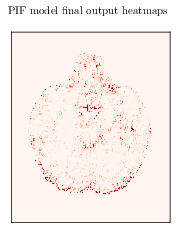

In [107]:
lrp_layer = "score"

fig = plt.figure()
fig.set_size_inches(w=3.6, h=3.5)
# load image
exp_nifti = nib.load(os.path.join(exp_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-{}.nii.gz".format(lrp_layer)))
exp_img = exp_nifti.get_data()
vmin, vmax = np.percentile(exp_img, 90.0), np.percentile(exp_img, 99.9)
plt.imshow(np.rot90(exp_img[:,:,48]), cmap='Reds', vmin=vmin, vmax=vmax)
# modify
plt.xticks([], [])
plt.yticks([], [])
fig.suptitle("PIF model final output heatmaps", fontsize=11, fontweight="bold")
#plt.subplots_adjust(top=0.85)
fig.savefig(os.path.join(save_dir, "LRP_heatmaps_experiment_score_UKB.pgf"), bbox_inches='tight', dpi=250)
fig.show()

### Layer Conv4 comparison

In [13]:
filter_pos = 0
lrp_layer = "Conv4"
patch_pos = None


In [17]:
exp_nifti = nib.load(os.path.join(exp_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-{}_Filter-{}.nii.gz".format(lrp_layer, filter_pos)))
exp_img = exp_nifti.get_data()

bsl_nifti = nib.load(os.path.join(bsl_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-{}_Filter-{}.nii.gz".format(lrp_layer, filter_pos)))
bsl_img = bsl_nifti.get_data()

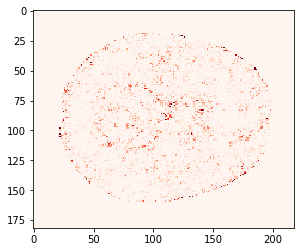

In [16]:
vmin, vmax = np.percentile(exp_img, 90.0), np.percentile(exp_img, 99.9)
plt.imshow(exp_img[:,:,90], cmap='Reds', vmin=vmin, vmax=vmax)
plt.show()

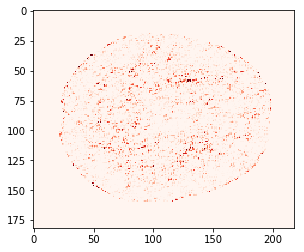

In [19]:
vmin, vmax = np.percentile(bsl_img, 90.0), np.percentile(bsl_img, 99.9)
plt.imshow(bsl_img[:,:,90], cmap='Reds', vmin=vmin, vmax=vmax)
plt.show()

### Final layer (conv 5/pif)

In [32]:
filter_pos = 4
lrp_layer = "Conv5"

bsl_nifti = nib.load(os.path.join(bsl_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-{}_Filter-{}.nii.gz".format(lrp_layer, filter_pos)))
bsl_img = bsl_nifti.get_data()

filter_pos = 2
lrp_layer = "pif_layer"
patch_pos = 10

exp_nifti = nib.load(os.path.join(exp_heatmap_dir, "LRP_latent-feature-map_visualization_Layer-{}_Patch-{}_Filter-{}.nii.gz".format(lrp_layer, patch_pos, filter_pos)))
exp_img = exp_nifti.get_data()

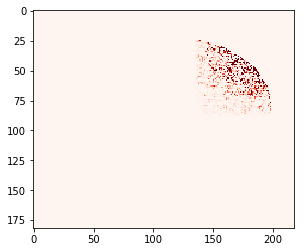

In [33]:
vmin, vmax = np.percentile(exp_img, 90.0), np.percentile(exp_img, 99.9)
plt.imshow(exp_img[:,:,90], cmap='Reds', vmin=vmin, vmax=vmax)
plt.show()

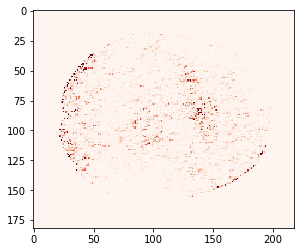

In [34]:
vmin, vmax = np.percentile(bsl_img, 90.0), np.percentile(bsl_img, 99.9)
plt.imshow(bsl_img[:,:,90], cmap='Reds', vmin=vmin, vmax=vmax)
plt.show()